## 收集

In [1]:
#导入库
import pandas as pd
import numpy as np
import requests
import os
import re

In [20]:
#为Github repo中三个文件的url建立列表
url1 = 'https://github.com/udacity/new-dand-advanced-china/raw/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
url2 = 'https://github.com/udacity/new-dand-advanced-china/raw/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt'
url3 = 'https://github.com/udacity/new-dand-advanced-china/raw/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv'
git_url = [url1 , url2 , url3]
#建立循环,，通过requests模块下载文件
for url in git_url:
    response = requests.get(url)
    #将文件内容储存在当前文件夹，并以url最后一个斜线后面的字符命名文件
    with open (url.split('/')[-1] , mode = 'wb') as file:
        file.write(response.content)
#查看当前文件夹下的内容
os.listdir()

['.ipynb_checkpoints',
 'image-predictions.tsv',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'wrangle_act.ipynb']

In [2]:
# 打开json.txt文件，将该文件中的信息转化为 DataFrame格式
import json
# 创建一个空列表，df_list，并附加字典,这个字典列表最终将被转换为DataFrame
df_list = []
with open('tweet_json.txt') as file:
    line = file.readline()
    while line:
        # 字符串中对应的值添加到字典列表中
        df_list.append({'tweet_id':json.loads(line)['id'],
                        'retweet_count':json.loads(line)['retweet_count'],
                        'favorite_count':json.loads(line)['favorite_count']})
        line = file.readline()
#将列表转化为 DataFrame
df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [3]:
#用pandas读取-predictions.tsv文件及twitter-archive-enhanced文件
df_image = pd.read_csv('image-predictions.tsv',sep = '\t')
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

## 评估

In [4]:
df_twitter.shape

(2356, 17)

In [5]:
#设置显示列宽
pd.set_option('max_colwidth', -1)

In [6]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [7]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#查看狗子name的所有值
df_twitter.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [9]:
#查看 name 为小写的推文
df_twitter.loc[(df_twitter.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [10]:
df_twitter.rating_numerator.sort_values()

315     0   
1016    0   
2335    1   
2261    1   
2338    1   
605     1   
1446    1   
1869    1   
2091    1   
2038    1   
1940    1   
1764    2   
2310    2   
1761    2   
1920    2   
2246    2   
2237    2   
2349    2   
2326    2   
2079    2   
2305    3   
1249    3   
1898    3   
1478    3   
1692    3   
2202    3   
765     3   
1928    3   
1314    3   
2183    3   
       ..   
866     14  
83      14  
291     15  
285     15  
55      17  
1663    20  
516     24  
1712    26  
763     27  
1433    44  
1274    45  
1202    50  
1351    60  
340     75  
695     75  
1254    80  
433     84  
1843    88  
1228    99  
1635    121 
1634    143 
1779    144 
902     165 
290     182 
1120    204 
2074    420 
188     420 
189     666 
313     960 
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [11]:
#查看评分分母的值
df_twitter.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [12]:
df_twitter.duplicated().sum()

0

In [13]:
df_image.shape

(2075, 12)

In [14]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
df_image.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [16]:
df_twitter[df_twitter.tweet_id == 666268910803644416]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910803644416/photo/1,10,10,None,None,None,None,None


In [17]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [18]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
df_image.duplicated().sum()

0

In [20]:
df_json.shape

(2352, 3)

In [21]:
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


In [22]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [24]:
df_json.duplicated().sum()

0

#### 质量问题
##### `twitter-archive-enhanced` 表格

- 我们只需要含有图片的原始评级 (不包括转发)，需要清理没有附图，转发的以及与狗子评级不相关的推文条目
- in_reply_to_status_id列，in_reply_to_user_id列的有效数据非常少，且对分析并无实质性作用
- 在name列及狗子地位列中空值为字符串 'None'，而不是 NaN
- 狗子的等级数据提取错误，同一只狗子出现了两种地位类型，并且有缺失值 ***(缺失值无法完全清理)***
- 推特档案中部分狗子的名字提取错误，并且有缺失值 ***(缺失值无法完全清理)***
- 推特档案中部分狗子的评分数据包含缺失值及无效值
- source列数据冗余，不清晰，应只包含推特来源，而不是现在呈现的网址格式
- source列，狗子等级应该是分类类型，而不是字符串
- timestamp应该是时间类型而不是字符串

##### `image-predictions` 表格

- 错误的数据类型 （p1,p2,p3列应为分类类型，而不是字符串类型）


##### `tweet_json` 表格

- 无

#### 清洁度问题
-  狗子的等级应为单独的一列
-  将image-predictions中的预测结果增加至twitter-archive-enhanced表格
-  将retweet_count及favorite_count增加至twitter-archive-enhanced表格

## 清理

In [35]:
#备份数据
twitter_clean = df_twitter.copy()
image_clean = df_image.copy()
json_clean = df_json.copy()

### 冗余数据

####  我们只需要含有图片的原始评级 (不包括转发)，需要清理没有附图，转发的以及与狗子评级不相关的推文条目（没有附图的推文在整洁度问题的解决方案中进行清理）

##### 定义
- 根据retweeted_status_id列是否为空，判断是否为转发的推文，根据筛选结果删除相关行；
- 根据推文文本中是否包含‘We only rate dogs’，判断该推文是否与评论狗子有关，根据筛选结果删除相关行；

##### 代码

In [37]:
#删除转发的推文相关行
twitter_clean.drop(twitter_clean[twitter_clean.retweeted_status_id.notnull()].index , inplace = True)

In [38]:
#删除与评论狗子不相关的推文，即包含“We only rate dogs”的推文
twitter_clean.drop(twitter_clean[twitter_clean.text.str.contains("We only rate dogs")].index , inplace = True)

##### 测试

In [39]:
twitter_clean.retweeted_status_id.notnull().sum()

0

In [41]:
twitter_clean.text.str.contains("We only rate dogs").sum()

0

因为在本次清理中，转发的推文内容已经被删除，故有必要删除与转发有关的列 retweeted_status_id, retweeted_status_user_id 以及 retweeted_status_timestamp

In [42]:
twitter_clean = twitter_clean.drop(['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp'], axis = 1)

#### `twitter-archive-enhanced `： in_reply_to_status_id列，in_reply_to_user_id列的有效数据非常少，且对分析并无实质性作用

##### 定义
- 删除该两列

##### 代码

In [43]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id' , 'in_reply_to_user_id'], axis = 1)

##### 测试

In [44]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 质量问题（一）

#### `twitter-archive-enhanced `： 在name列及狗子地位列中空值为字符串 'None'，而不是 NaN

##### 定义
通过字符串方法 str.replace ，将目标列中的 'None'，替换为空值 np.NaN

##### 代码

In [45]:
#将需替换空值的列名建立序列
clo_name = ['name' , 'doggo' , 'floofer' , 'pupper' , 'puppo']
for i in clo_name:
    twitter_clean[i] = twitter_clean[i].replace('None', np.NaN)

##### 测试

In [46]:
twitter_clean[['name' , 'doggo' , 'floofer' , 'pupper' , 'puppo']].sample(10)

,name,doggo,floofer,pupper,puppo
2285,NaN,NaN,NaN,NaN,NaN
894,Luna,NaN,NaN,NaN,NaN
1076,Benji,NaN,NaN,pupper,NaN
1495,Amber,NaN,NaN,NaN,NaN
1303,Keurig,NaN,NaN,NaN,NaN
1040,actually,NaN,NaN,pupper,NaN
2058,Lola,NaN,NaN,NaN,NaN
575,Bones,doggo,NaN,pupper,NaN
651,Monster,NaN,NaN,NaN,NaN
1348,Ralphson,NaN,NaN,pupper,NaN


### 质量

#### `twitter-archive-enhanced ` 推特档案中部分狗子的名字提取错误，并且有缺失值 ***(缺失值无法完全清理)***

##### 定义
- 名字提取错误的原因应该为不够准确的正则表达式。根据推文内容判断，狗子的名称应该包含在 “This is .../Meet .../Say hello to .../Here we have .../...named.../...name is ...” 中，根据特定格式，利用正则表达式，编写函数，提取推文中的姓名。
- 由于部分推文内容不包含名字，无法完全清理缺失值

##### 代码

In [47]:
# 定义提取名字的函数
def text_name(text):
    if re.match(r'This is [A-Z].*', text):
        return text.split()[2].strip(',').strip('.')
    elif re.match(r'Meet [A-Z].*', text):
        return text.split()[1].strip(',').strip('.')
    elif re.match(r'Say hello to [A-Z].*', text):
        return text.split()[3].strip(',').strip('.')
    elif re.match(r'Here we have [A-Z].*', text):
        return text.split()[3].strip(',').strip('.')
    elif re.match(r'.*? named [A-Z].*', text):
        return text.split()[text.split().index('named') + 1].strip(',').strip('.')
    elif re.match(r'.*? name is [A-Z].*', text):
        return text.split('name is')[1].split()[0].strip(',').strip('.')
    else:
        return np.NaN

In [48]:
#为 name 列重新赋值
twitter_clean.name = twitter_clean.text.apply(text_name)

##### 测试

In [49]:
twitter_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Maisey', 'Howard', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',

####  `twitter-archive-enhanced` 狗子的地位数据提取错误，部分推文的狗子对应了两种地位类型

##### 定义
该错误原因应该是将狗子昵称doggo 当做狗子的地位类型进行提取；或是一条推文中同时评论了两条狗，同时包含doggo与其它类型。

筛选出现两种类型的推文，将错误提取行对应的doggo列或其它列的数据删除或更改，仅保留一种类型

将同时评论两条狗子的数据拆分为两行内容，分别对应两种不同的类型

##### 代码

In [50]:
#出现多种类型的狗子地位的推文数据
twitter_clean[twitter_clean[['doggo','floofer','pupper','puppo']].count(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,doggo,NaN,NaN,puppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,NaN,doggo,floofer,NaN,NaN
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,Burke,doggo,NaN,pupper,NaN
565,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,NaN,pupper,NaN
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,NaN,pupper,NaN
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1

In [51]:
# tweet_id 785639753186217984 的狗子地位应该为doggo，而不是puper
twitter_clean.loc[twitter_clean.tweet_id == 785639753186217984 , 'pupper'] = np.NaN

In [52]:
#tweet_id 808106460588765185|802265048156610565|741067306818797568|733109485275860992 应该为两只狗子的数据，将该列拆分为两行
#同时评论两只狗子的类型正好都是 doggo与 pupper
df_mu = twitter_clean.query('tweet_id == [808106460588765185,802265048156610565,741067306818797568,733109485275860992]').copy()
#复制的行中，狗子类型仅包含doggo
df_mu.loc[: , 'pupper'] = np.NaN
#根据推文内容，将复制的tweet_id为‘808106460588765185’的 name 值改为‘Dexter’
df_mu.loc[df_mu.tweet_id == 808106460588765185 , 'name'] = 'Dexter'

In [53]:
#将复制的行新增到数据集中
twitter_clean = pd.concat([twitter_clean , df_mu])

In [54]:
#将处理过后剩余的包含有两种类型的推文中对应 doggo列 中的数据改为空值
twitter_clean.loc[twitter_clean[['doggo','floofer','pupper','puppo']].count(axis=1) > 1 , 'doggo'] = np.NaN

##### 测试

In [55]:
#出现多种类型的狗子地位的数据
twitter_clean[twitter_clean[['doggo','floofer','pupper','puppo']].count(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [56]:
twitter_clean[twitter_clean.tweet_id == 808106460588765185]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,Burke,NaN,NaN,pupper,NaN
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,Dexter,doggo,NaN,NaN,NaN


### 整洁度问题


####  `twitter-archive-enhanced` 表格中狗子的评级应为单独的一列

##### 定义
- 在 twitter_clean 数据集中新增一列 dog_stage ，内容为 doggo,floofer,pupper,puppo 列中值的并集

##### 代码

In [57]:
#将'doggo', 'floofer', 'pupper', 'puppo'列中的 空值NaN 替换为 空字符串，便于列相加
twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace(np.NaN,'')

In [58]:
#新建等级列，并通过各等级列相加赋值
twitter_clean['dog_stage'] = twitter_clean['doggo'] + twitter_clean['floofer'] + twitter_clean['pupper'] + twitter_clean['puppo']

In [59]:
#将新增列中的 空字符串替换为 空值NaN
twitter_clean['dog_stage'] = twitter_clean['dog_stage'].replace('' , np.NaN)

In [60]:
# 删除数据集中的doggo,floofer,pupper,puppo 列
twitter_clean = twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

##### 测试

In [61]:
twitter_clean['dog_stage'].value_counts()

pupper     233
doggo      80 
puppo      25 
floofer    10 
Name: dog_stage, dtype: int64

In [63]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


####  将image-predictions中的预测结果增加至twitter-archive-enhanced表格
####  将retweet_count及favorite_count增加至twitter-archive-enhanced表格

##### 定义
- 使用 merge函数 将 image_clean 以 tweet_id列 对齐，合并到 twitter_clean 中，使用 inner 方式，以清除没有附图的推文
- 使用 merge函数 将 json_clean 以 tweet_id列 对齐，合并到 twitter_clean 中，并且使用来自 twitter_clean 中的键

##### 代码

In [64]:
twitter_clean = pd.merge(twitter_clean, image_clean, how = 'inner', on = ['tweet_id'])
twitter_clean = pd.merge(twitter_clean, json_clean, how = 'left', on = ['tweet_id'])

##### 测试

In [65]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016


In [67]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1949
Data columns (total 22 columns):
tweet_id              1950 non-null int64
timestamp             1950 non-null object
source                1950 non-null object
text                  1950 non-null object
expanded_urls         1950 non-null object
rating_numerator      1950 non-null int64
rating_denominator    1950 non-null int64
name                  1376 non-null object
dog_stage             310 non-null object
jpg_url               1950 non-null object
img_num               1950 non-null int64
p1                    1950 non-null object
p1_conf               1950 non-null float64
p1_dog                1950 non-null bool
p2                    1950 non-null object
p2_conf               1950 non-null float64
p2_dog                1950 non-null bool
p3                    1950 non-null object
p3_conf               1950 non-null float64
p3_dog                1950 non-null bool
retweet_count         1950 non-null int64

### 质量问题（二）

#### 推特档案中部分狗子的评分数据包含缺失值及无效值

##### 定义
- 筛选狗子评分为0值的推文，发现推文与狗子的评分没有相关联系，根据筛选结果，删除该条数据；
- 筛选出不具有正常评分格式的推文，即推文中不包含‘/10’（针对单条狗子的评分）或者‘/10的倍数’（针对多条狗子的评分），删除该条数据；
- 利用正则表达式建立评分分数的提取函数，将分子按照单条狗子的评分进行赋值（如推文中为多条狗子的评分，则取平均值），分母列统一赋值为10；
- 删除异常值（分子评分较正常数值过大的行）

##### 代码

In [68]:
# 查看评分 分子或分母 为0值的推文
twitter_clean.query('rating_numerator == 0 or rating_denominator == 0' )

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
223,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,NaN,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,3425,24478
735,746906459439529985,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,NaN,NaN,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,...,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False,334,3158


In [69]:
# 删除相关推文条目
twitter_clean.drop(twitter_clean[twitter_clean.rating_numerator == 0].index , inplace = True)

In [70]:
#不含有正常评分格式的推文，即不包含“/*0”的推文
twitter_clean[~twitter_clean['text'].str.contains("/*0")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
369,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1647,5904


In [71]:
#删除不含有正常评分格式的推文，即不包含“/*0”的推文
twitter_clean.drop(twitter_clean[~twitter_clean['text'].str.contains("/*0")].index , inplace = True)

In [72]:
#用正则表达式建立提取函数
re_rating = re.compile(r'.*?(\d+\.?\d{0,2})/(\d{1,2}0).*' , re.DOTALL)
def rate(text):
    if re_rating.match(text).group(2) == '10':
        return float((re_rating.match(text).group(1)))
    else:
        return ((10 * int(re_rating.match(text).group(1))) / int(re_rating.match(text).group(2)))

In [73]:
#用建立的函数提取推文中的评分为 rating_numerator 列赋值
twitter_clean.rating_numerator = twitter_clean.text.apply(lambda x: rate(x))
#为 rating_denominator 列赋值
twitter_clean.rating_denominator = 10

In [74]:
#查看当前分子数值的分布
twitter_clean.rating_numerator.value_counts()

12.00      445
10.00      412
11.00      392
13.00      258
9.00       145
8.00       93 
7.00       50 
14.00      35 
5.00       32 
6.00       32 
3.00       18 
4.00       15 
2.00       10 
1.00       4  
1776.00    1  
9.75       1  
13.50      1  
11.26      1  
11.27      1  
420.00     1  
Name: rating_numerator, dtype: int64

In [76]:
# 删除异常值
twitter_clean.drop(twitter_clean.query('rating_numerator == [420.00,1776.00]').index , inplace = True)

##### 测试

In [77]:
twitter_clean.query('rating_numerator == 0 or rating_denominator == 0' )

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [78]:
twitter_clean.rating_numerator.value_counts()

12.00    445
10.00    412
11.00    392
13.00    258
9.00     145
8.00     93 
7.00     50 
14.00    35 
6.00     32 
5.00     32 
3.00     18 
4.00     15 
2.00     10 
1.00     4  
9.75     1  
11.26    1  
13.50    1  
11.27    1  
Name: rating_numerator, dtype: int64

In [79]:
twitter_clean.rating_denominator.unique()

array([10], dtype=int64)

#### source列数据冗余，不清晰，应只包含推特来源，而不是现在呈现的网址格式

##### 定义
- 根据字符格式用正则表达式提取source列中的来源

##### 代码

In [80]:
twitter_clean['source'] = twitter_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

##### 测试

In [81]:
twitter_clean['source'].value_counts()

Twitter for iPhone    1907
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

#### 错误的数据类型

##### 定义
用astype()方法更改以下数据类型
- in_reply_to_status_id的数据类型应由float改为int
- in_reply_to_user_id的数据类型应由float改为int
- timestamp的数据类型应由字符串改为datetime
- source,dog_stage,p1,p2,p3列的数据类型应由字符串改为category

##### 代码

In [82]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])
twitter_clean['source'] = twitter_clean['source'].astype('category')
twitter_clean['dog_stage'] = twitter_clean['dog_stage'].astype('category')
twitter_clean['p1'] = twitter_clean['p1'].astype('category')
twitter_clean['p2'] = twitter_clean['p2'].astype('category')
twitter_clean['p3'] = twitter_clean['p3'].astype('category')

##### 测试

In [83]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 1949
Data columns (total 22 columns):
tweet_id              1945 non-null int64
timestamp             1945 non-null datetime64[ns]
source                1945 non-null category
text                  1945 non-null object
expanded_urls         1945 non-null object
rating_numerator      1945 non-null float64
rating_denominator    1945 non-null int64
name                  1374 non-null object
dog_stage             310 non-null category
jpg_url               1945 non-null object
img_num               1945 non-null int64
p1                    1945 non-null category
p1_conf               1945 non-null float64
p1_dog                1945 non-null bool
p2                    1945 non-null category
p2_conf               1945 non-null float64
p2_dog                1945 non-null bool
p3                    1945 non-null category
p3_conf               1945 non-null float64
p3_dog                1945 non-null bool
retweet_count        

### 导出整理后的数据

##### 代码

In [84]:
twitter_clean.to_csv('twitter_archive_master.csv', index=False,encoding = 'utf-8')

##### 测试

In [85]:
#导入评估，清洗完成的清洁数据
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 22 columns):
tweet_id              1945 non-null int64
timestamp             1945 non-null object
source                1945 non-null object
text                  1945 non-null object
expanded_urls         1945 non-null object
rating_numerator      1945 non-null float64
rating_denominator    1945 non-null int64
name                  1374 non-null object
dog_stage             310 non-null object
jpg_url               1945 non-null object
img_num               1945 non-null int64
p1                    1945 non-null object
p1_conf               1945 non-null float64
p1_dog                1945 non-null bool
p2                    1945 non-null object
p2_conf               1945 non-null float64
p2_dog                1945 non-null bool
p3                    1945 non-null object
p3_conf               1945 non-null float64
p3_dog                1945 non-null bool
retweet_count         1945 non-null int

### 可视化分析

In [86]:
#导入库
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

#### 1.狗子评分的分布

In [87]:
df_master.rating_numerator.describe()

count    1945.000000
mean     10.565954  
std      2.164947   
min      1.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

In [88]:
df_master.rating_numerator.value_counts().sort_values()

11.27    1  
11.26    1  
9.75     1  
13.50    1  
1.00     4  
2.00     10 
4.00     15 
3.00     18 
5.00     32 
6.00     32 
14.00    35 
7.00     50 
8.00     93 
9.00     145
13.00    258
11.00    392
10.00    412
12.00    445
Name: rating_numerator, dtype: int64

Text(0,0.5,'Rating')

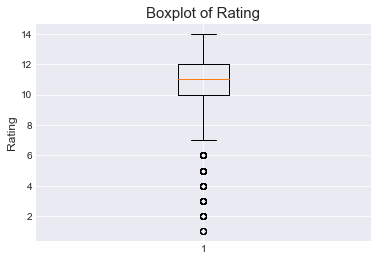

In [89]:
plt.boxplot(df_master.rating_numerator,sym ="o")#建立箱线图
plt.title('Boxplot of Rating',fontsize = 15)
plt.ylabel('Rating',fontsize = 12)

#### 结论

由评分的分布可以看出，狗子评分的值域为13.00，最大值为14，最小值为1，中值为11.00，众数为12.00，平均值为10.57，分布呈现“左偏态”的特点。


#### 2.狗子评分值与点赞数量的相关性

Text(0,0.5,'Favorite Counts')

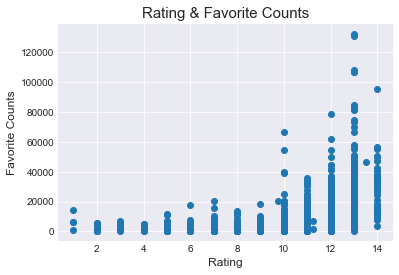

In [91]:
#绘制狗子评分与点赞数的散点关系图
plt.scatter(x = df_master.rating_numerator , y = df_master.favorite_count)
plt.title('Rating & Favorite Counts',fontsize = 15)
plt.xlabel('Rating',fontsize = 12)
plt.ylabel('Favorite Counts',fontsize = 12)

- 建立狗子评分与点赞数线性回归模型

In [92]:
#导入库
import statsmodels.api as sm
#新建回归用的数据集
df_regress = df_master[['rating_numerator' , 'favorite_count']].copy()
#增加截距列
df_regress['intercept'] = 1
lm = sm.OLS(df_regress['favorite_count'] , df_regress[['intercept' , 'rating_numerator']])
#拟合模型
results = lm.fit()
#储存结果并查看摘要
results.summary()

E:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     408.0
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.64e-82
Time:                        20:06:38   Log-Likelihood:                -20868.
No. Observations:                1945   AIC:                         4.174e+04
Df Residuals:                    1943   BIC:                         4.175e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept        -1.601e+04   1249.370    -12.814      0.000   -1.85e+04   -1.36e+04
rating_numerator  2339.8536    115.839     20.199      0.000    2112.671    2567.036
==============================================================================
Omnibus:                     1670.533   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60576.554
Skew:                           3.897   Prob(JB):                         0.00
Kurtosis:                      29.206   Cond. No.                         54.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
np.sqrt(0.174)

0.41713307229228419

#### 结论
推特的点赞数与狗子评分的相关系数为0.417，为中度正相关；

点赞数17.4%的可变性可通过狗子的评分进行解释，剩下的82.6%的可变性则决定于其它推特因素；

预测推特的点赞数与狗子的评分具有统计相关性，狗子的评分每增加1分，则该推特点赞数会增加2340个。

#### 3.推特发布数量与获得点赞数的时间分布

In [97]:
#将数据集中的timestamp列更改为datetime类型
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])

In [98]:
#新建数据集
df_master['month'] = df_master['timestamp'].dt.month
df_master['year'] = df_master['timestamp'].dt.year
df_time = df_master.groupby(['year' , 'month'])[['retweet_count','favorite_count']].agg(['count', 'mean'])
df_time.head()

retweet_count              favorite_count             
                   count         mean          count         mean
year month                                                       
2015 11     295           524.881356   295            1209.857627
     12     361           1514.382271  361            3502.681440
2016 1      166           1526.204819  166            4039.975904
     2      108           1386.777778  108            3829.990741
     3      118           1602.830508  118            4529.559322

- 推特月发布数量随时间的分布

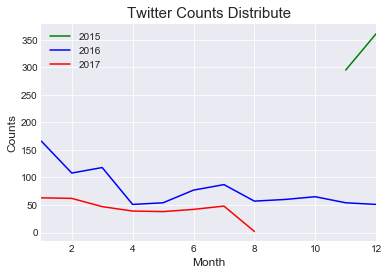

In [100]:
df_time.loc[2015,'favorite_count'].loc[:,'count'].plot(color = 'g' , label= '2015')
df_time.loc[2016,'favorite_count'].loc[:,'count'].plot(color = 'b' , label= '2016')
df_time.loc[2017,'favorite_count'].loc[:,'count'].plot(color = 'r' , label= '2017')
# 标题和标签
plt.ylabel('Counts',fontsize = 12)
plt.xlabel('Month',fontsize = 12)
plt.title('Twitter Counts Distribute',fontsize = 15)
plt.legend()

- 推特月平均点赞数量随时间的分布

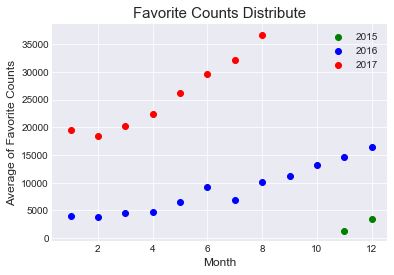

In [102]:
plt.scatter(x = df_time.loc[2015].index , y = df_time.loc[2015,'favorite_count'].loc[:,'mean'] , color = 'g' , label= '2015')
plt.scatter(x = df_time.loc[2016].index , y = df_time.loc[2016,'favorite_count'].loc[:,'mean'] , color = 'b' , label= '2016')
plt.scatter(x = df_time.loc[2017].index , y = df_time.loc[2017,'favorite_count'].loc[:,'mean'] , color = 'r' , label= '2017')
# 标题和标签
plt.ylabel('Average of Favorite Counts',fontsize = 12)
plt.xlabel('Month',fontsize = 12)
plt.title('Favorite Counts Distribute',fontsize = 15)
plt.legend()

#### 结论

- 由图可以看出，随着时间（年或者月）的推移，推特的发布数量呈下降的趋势；而推特点赞的月平均数量随时间的推移呈现数量增长的趋势。
